In [1]:
import pandas as pd

# products = pd.read_csv('./products.csv')
products = pd.read_csv('./products_join_categories.csv')
products.sample(10)

,Unnamed: 0,productId,name,catIds,cat1,cat1_name,cat2,cat2_name,cat3,cat3_name
14095,14095,14095,尚明正品 顶级耐热玻璃飘逸杯 个人泡茶器 过滤茶杯 茶具 S-022,"933,833,587",933,家居生活,833,厨房/餐具,587.0,茶具
89750,89750,89750,中东国家通史:沙特阿拉伯卷,"832,723,221",832,图书音像,723,人文社科类图书,221.0,政治/军事
458452,458452,458452,性别与家国:汉晋辞赋的楚骚论述,"832,519,599",832,图书音像,519,文学艺术,599.0,文学类
132888,132888,132888,创新 ZEN Aurvana In Ear 入耳式动铁耳机 黑色,"1128,823,1159",1128,手机/数码,823,数码配件,1159.0,MP3/MP4配件
174379,174379,174379,儿童中国文化导读????大字拼音读诵本????易经(上下),"832,1101,1086",832,图书音像,1101,少儿/教育图书,1086.0,少儿
290170,290170,290170,网络协议与网络安全,"832,723,221",832,图书音像,723,人文社科类图书,221.0,政治/军事
311653,311653,311653,项目时间管理,"832,1101,1116",832,图书音像,1101,少儿/教育图书,1116.0,考试
2501,2501,2501,VICTOR 胜利 超级波 3150 SW-3150 羽毛球拍,"1111,666,755",1111,运动户外,666,体育用品,755.0,羽毛球相关
506063,506063,506063,编织金典5200女人衣橱,"832,665,117",832,图书音像,665,生活类图书,117.0,时尚/美妆
445268,445268,445268,美国文化变迁探索:从清教文化到消费文化的历史演变,"832,723,724",832,图书音像,723,人文社科类图书,724.0,文化


In [2]:
# chunksize = 500000
# col_names =  ['userId', 'productId', 'rating']
# final  = pd.DataFrame(columns = col_names)
# totalRows = 0
# for chunk in pd.read_csv('D:/step/ratings.csv', chunksize=chunksize):
#     del chunk['timestamp']
#     del chunk['comment']
#     del chunk['title']
#     final = pd.concat([final,chunk])
#     totalRows+=chunk.shape[0]
#     print("processing the first " + str(totalRows) + " rows" )
    
# print("Origin TotalRow is totalRows " + str(totalRows) )
# print( "After process , the totalRow is " + str(final.shape[0]) )
# final.head()
# final.to_csv('D:/step/ratings_drop.csv', encoding="utf_8_sig")

In [2]:
categories = pd.read_csv( './categories.csv')

print('Category types：%d' % categories.shape[0])
categories.set_index('catId', inplace=True)

Category types：1175


In [11]:
# for idr, row in products.iterrows():
#     split = row['catIds'].split(",") 
#     for i in range(len(split)):
#         products.at[idr, 'cat'+str(i+1)] = split[i]
#         products.at[idr, 'cat'+str(i+1)+'_name'] = categories.loc[int(split[i])]['category']

# products.to_csv('./products_join_categories.csv', encoding="utf_8_sig")
# products.head(10)

,productId,name,catIds,cat1,cat1_name,cat2,cat2_name,cat3,cat3_name
0,0,CSSMs Biology: Control in Cells and in Organis...,"832,476,923",832,图书音像,476,其它图书,923,进口图书
1,1,Treasure Island,"832,1101,1086",832,图书音像,1101,少儿/教育图书,1086,少儿
2,2,Collins Primary Dictionaries – Collins Junior ...,"832,476,739",832,图书音像,476,其它图书,739,工具书
3,3,Partners in Crime,"832,476,923",832,图书音像,476,其它图书,923,进口图书
4,4,The Hobbit,"832,1101,1086",832,图书音像,1101,少儿/教育图书,1086,少儿
5,5,Caps for Sale Book and CD,"832,476,923",832,图书音像,476,其它图书,923,进口图书
6,6,The Gulag Archipelago Volume 3: An Experiment ...,"832,476,923",832,图书音像,476,其它图书,923,进口图书
7,7,150 Best Bathroom Ideas,"832,476,923",832,图书音像,476,其它图书,923,进口图书
8,8,The Forgotten Warrior,"832,476,923",832,图书音像,476,其它图书,923,进口图书
9,9,Free Fall,"832,1101,1086",832,图书音像,1101,少儿/教育图书,1086,少儿


In [3]:
print("Product count: %d" % products.shape[0])
print("Null in cat1: %d" % products['cat1'].isnull().sum())
print("Null in cat2: %d" % products['cat2'].isnull().sum())
print("Null in cat3: %d" % products['cat3'].isnull().sum())

Product count: 525619
Null in cat1: 0
Null in cat2: 0
Null in cat3: 1202


Text(0.5, 0, 'cat1')

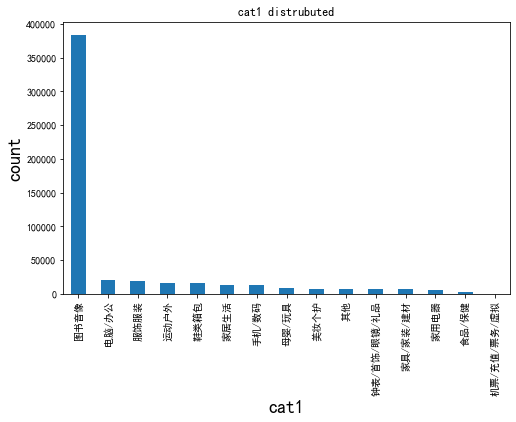

In [5]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False

d = {'cat1':products['cat1_name'].value_counts().index, 'count': products['cat1'].value_counts()}
df_cat1 = pd.DataFrame(data=d).reset_index(drop=True)

df_cat1.plot(x='cat1', y='count', kind='bar', legend=False,  figsize=(8, 5))
plt.title("cat1 distrubuted")
plt.ylabel('count', fontsize=18)
plt.xlabel('cat1', fontsize=18)

Text(0.5, 0, 'cat2')

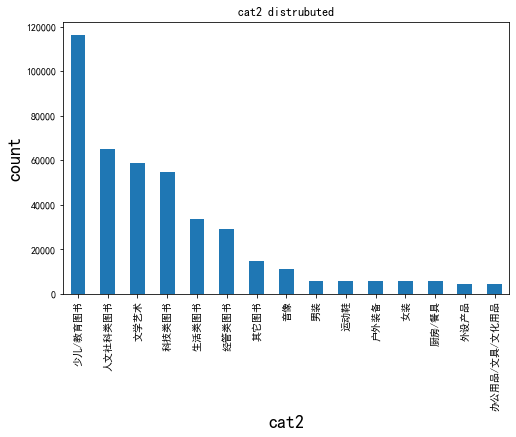

In [6]:
d = {'cat2':products['cat2_name'].value_counts().index, 'count': products['cat2'].value_counts()}
df_cat2 = pd.DataFrame(data=d).reset_index(drop=True)
df_cat2 = df_cat2.sort_values(by="count",ascending= False).head(15)

df_cat2.plot(x='cat2', y='count', kind='bar', legend=False,  figsize=(8, 5))
plt.title("cat2 distrubuted")
plt.ylabel('count', fontsize=18)
plt.xlabel('cat2', fontsize=18)

Text(0.5, 0, 'cat3')

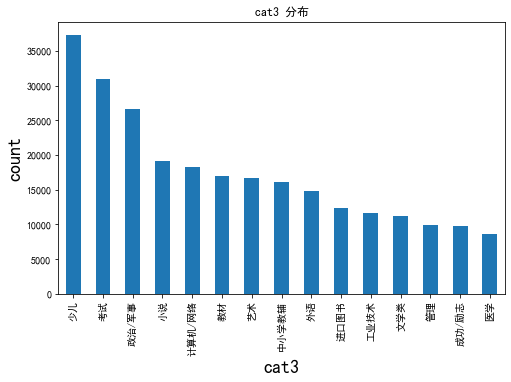

In [7]:
d = {'cat3':products['cat3_name'].value_counts().index, 'count': products['cat3'].value_counts()}
df_cat3 = pd.DataFrame(data=d).reset_index(drop=True)
df_cat3 = df_cat3.sort_values(by="count",ascending= False).head(15)

df_cat3.plot(x='cat3', y='count', kind='bar', legend=False,  figsize=(8, 5))
plt.title("cat3 分布")
plt.ylabel('count', fontsize=18)
plt.xlabel('cat3', fontsize=18)

In [3]:
import re
import jieba as jb

def processText(text, join_str = " ", array = False):
    text = str(text)
    if text.strip()=='':
        return ''
    r = '[’!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]+'
    text = re.sub(r, '', text)
    # cut word, GitBub: https://github.com/fxsjy/jieba
    text = join_str.join([w for w in list(jb.cut(text)) if w !=' '])
    return text

product_lists = products[['productId','name']]


In [4]:
product_lists['cut_name'] = product_lists['name'].apply(processText)
product_lists.head()


Building prefix dict from the default dictionary ...
Loading model from cache D:\System\Windows\TEMP\jieba.cache
Loading model cost 0.557 seconds.
Prefix dict has been built succesfully.
D:\System\Users\mb95540\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,productId,name,cut_name
0,0,CSSMs Biology: Control in Cells and in Organis...,CSSMs Biology Control in Cells and in Organism...
1,1,Treasure Island,Treasure Island
2,2,Collins Primary Dictionaries – Collins Junior ...,Collins Primary Dictionaries – Collins Junior ...
3,3,Partners in Crime,Partners in Crime
4,4,The Hobbit,The Hobbit


In [5]:
from sklearn.feature_extraction.text import CountVectorizer
import plotly.graph_objs as go
import cufflinks
pd.options.display.max_columns = 30
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='solar')

def get_top_n_words(corpus, n=None, ngram = 1):
    vec = CountVectorizer(ngram_range=(ngram, ngram)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq, words_freq[:n]

In [6]:
words_freq, common_words = get_top_n_words(product_lists['cut_name'], 20)
df1 = pd.DataFrame(common_words, columns = ['cut_name' , 'count'])
df1.groupby('cut_name').sum()['count'].sort_values().iplot(kind='barh', xTitle='Count', linecolor='black', title='Most common 20 words in name')

In [11]:
with open("./baidu_stopwords.txt", encoding='utf-8') as f:
    stop_words = f.read()
stop_words = stop_words.split("\n")

In [12]:
words_fre = pd.DataFrame(words_freq, columns = ['cut_name' , 'count'])
words_freq_cut = words_fre[~words_fre.cut_name.isin(stop_words)]
common_words_cut = words_freq_cut[:20]

print("Before cut the stop words: %d" % len(words_freq))
print("After cut the stop words: %d" % len(words_freq_cut))
print("Cut %d stop words" % (len(words_freq) - len(words_freq_cut)))

Before cut the stop words: 248752
After cut the stop words: 247924
Cut 828 stop words


In [13]:
df2 = pd.DataFrame(common_words_cut, columns = ['cut_name' , 'count'])
df2.groupby('cut_name').sum()['count'].sort_values().iplot(kind='barh', xTitle='Count', linecolor='black', title='Most common 20 words in name after filter stop words')

In [14]:
words_freq3, common_words3 = get_top_n_words(product_lists['cut_name'], 20, 2)
df3 = pd.DataFrame(common_words3, columns = ['cut_name' , 'count'])
df3.groupby('cut_name').sum()['count'].sort_values(ascending=False).iplot(kind='bar', yTitle='Count', linecolor='black', title='Most common 20 words with Bigrams in name')

In [15]:
words_freq4, common_words4 = get_top_n_words(product_lists['cut_name'], 20, 3)
df4 = pd.DataFrame(common_words4, columns = ['cut_name' , 'count'])
df4.groupby('cut_name').sum()['count'].sort_values(ascending=False).iplot(kind='bar', yTitle='Count', linecolor='black', title='Most common 20 words with Trigrams in name')

In [99]:
# --------------------Tf-idf--------------------
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf  = TfidfVectorizer(analyzer='word', ngram_range=(1, 1), min_df=0).fit(product_lists['cut_name'])
tfidf_vec = tfidf.transform(product_lists['cut_name'])

In [100]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def recommendations(text,num):
    ss = [processText(text, ",")]
    print(ss)
    ss_vec = tfidf.transform(ss)
    print(ss_vec)
    cos_sim = cosine_similarity(ss_vec, tfidf_vec)
    arr =cos_sim[0]
    
    idxs=list(np.argsort(-arr)[:num])
    
    for idx in idxs:
        row = product_lists[product_lists.index==idx]
        productId = row.productId.values[0]
        name = row.name.values[0]
        print("productId:",productId,",",name)

In [91]:
recommendations("Python编程",20)

['Python,编程']
productId: 97657 , Python编程实践
productId: 505218 , Python核心编程(第2版)
productId: 509690 , 计算机编程导论——Python程序设计
productId: 187750 , Python标准库
productId: 122343 , Python基础教程(第2版)
productId: 113208 , Python学习手册(第4版)
productId: 488941 , 图灵程序设计丛书:Python编程入门(第3版)
productId: 335853 , 华章程序员书库????Python入门经典:以解决计算问题为导向的Python编程实践
productId: 235617 , Python计算与编程实践:多媒体方法(原书第2版)
productId: 378920 , Learning Python
productId: 486712 , Python参考手册(第4版)
productId: 270997 , Python 3程序开发指南(第2版)
productId: 454127 , Python Cookbook(第2版)(中文版)
productId: 303067 , 深入浅出Python(影印版)
productId: 502074 , Python科学计算(附CD-ROM光盘1张)
productId: 126697 , The Greedy Python
productId: 18547 , Python语言在Abaqus中的应用
productId: 515653 , C++编程你也行(附光盘)
productId: 352156 , 利用Python进行数据分析
productId: 2009 , C++游戏编程


In [21]:
recommendations("ccna",20)

productId: 440756 , CCNA学习与实验指南(修订版)(附CD光盘1张)
productId: 365493 , CCNA语音认证考试指南(附光盘)
productId: 250747 , CCNA学习指南(640-802)(第7版)((附光盘)
productId: 22160 , CCNA学习指南(中文第6版)(640-802)
productId: 170075 , CCNA学习指南(中文第6版)(640-802)
productId: 186452 , 思科网络技术学院教程????CCNA安全
productId: 503720 , 思科网络技术学院教程:CCNA安全(第2版)
productId: 322169 , 思科网络实验室CCNA实验指南
productId: 166557 , CCNA与CCNAS认证考试英语指南
productId: 90809 , CCNA ICND2认证考试指南(第2版)(附光盘1张)
productId: 299006 , CCNA ICND2(640-816)认证考试指南(第3版)(附光盘)
productId: 301208 , CCNA INTRO学习指南(640-821)(中文版)
productId: 285792 , 思科网络技术学院教程CCNA Discovery:计算机网络设计和支持
productId: 106528 , CCNA Discovery:在中小型企业或ISP工作(附赠VCD光盘1张)
productId: 369653 , CCNA学习指南:Cisco网络设备互连(ICND1)(第2版)
productId: 27998 , CCNA学习指南:Cisco网络设备互连(1CND2)(第3版)
productId: 448416 , 思科网络技术学院教程CCNA Exploration:网络基础知识(附赠光盘1张)
productId: 443312 , 思科网络技术学院教程CCNA Exploration:LAN交换无线(附VCD光盘1张)
productId: 164097 , 思科网络技术学院教程(CCNA Discovery:企业中的路由和交换)(附DVD光盘1张)
productId: 358494 , 思科网络技术学院教程CCNA Exploration:路由协议和